**<font size="5">Customer Segmentation Analysis using K-means</font>**

In today’s competitive world, it is crucial to understand customer behavior and categorize customers based on their demography and buying behavior. This is a critical aspect of customer segmentation that allows marketers to better tailor their marketing efforts to various audience subsets in terms of promotional, marketing and product development strategies.

Cases of study in this problem:
* Who spent more in terms of gender?
* What is the distribution of ages and annual income of the customers?
* How can we categorize the customers that are more likely to spend more?


Steps to solve this problem:
1. Importing Libraries.
2. Reading and exploration of the data.
3. Data Visualization.
4. Clustering using K-Means.

**<font size="4">1. Importing Libraries.</font>**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.cluster import KMeans

**<font size="4">2. Reading and exploration of the data.</font>**

In [11]:
data = pd.read_csv('../input/Mall_Customers.csv')

In [13]:
data.shape

(200, 5)

In [12]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [15]:
uniq = data.CustomerID.unique()
len(uniq)

200

In [16]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**<font size="4">3. Data Visualization.</font>**

In [17]:
data[['Gender','CustomerID']].groupby('Gender').count()

,CustomerID
Gender,
Female,112
Male,88


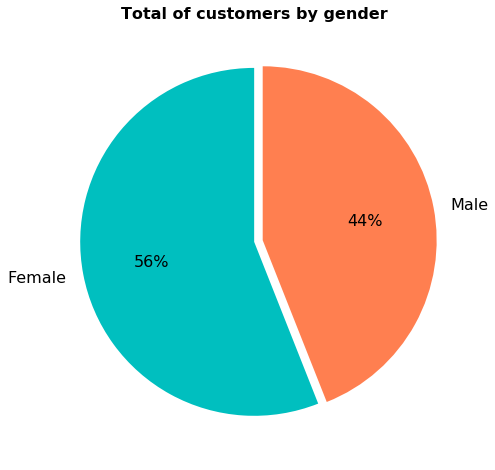

In [18]:
gender = data['Gender'].value_counts()
labels = ['Female', 'Male']
colors = ['c', 'coral']
explode = [0, 0.05]

plt.figure(figsize=(8,8))
plt.title('Total of customers by gender', fontsize = 16, fontweight='bold') 
plt.pie(gender, colors = colors, autopct = '%1.0f%%', labels = labels, explode = explode, startangle=90, textprops={'fontsize': 16})
plt.savefig('Total of customers by gender.png', bbox_inches = 'tight')
plt.show()

In [19]:
gender_spending = data[['CustomerID', 'Spending Score (1-100)','Gender']].groupby('Gender').mean()
gender_spending

,CustomerID,Spending Score (1-100)
Gender,,
Female,97.562500,51.526786
Male,104.238636,48.511364


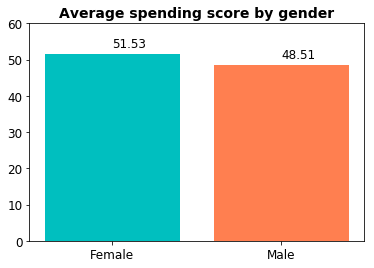

In [20]:
values = gender_spending['Spending Score (1-100)'].values
genders = ['Female', 'Male']

plt.title('Average spending score by gender', fontsize = 14, fontweight='bold')
plt.bar(genders[0], values[0], color = 'c')
plt.bar(genders[1], values[1], color = 'coral')
plt.yticks(np.arange(0, max(values)+10, 10), fontsize = 12)
plt.xticks(fontsize = 12)
for i in range(len(values)):
    plt.text(x = genders[i], y = values[i] + 2, s = round(values[i],2), size = 12)
plt.savefig('Average spending score by gender.png')
plt.show()    

In [21]:
ages = data[['Age']].describe()
ages

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


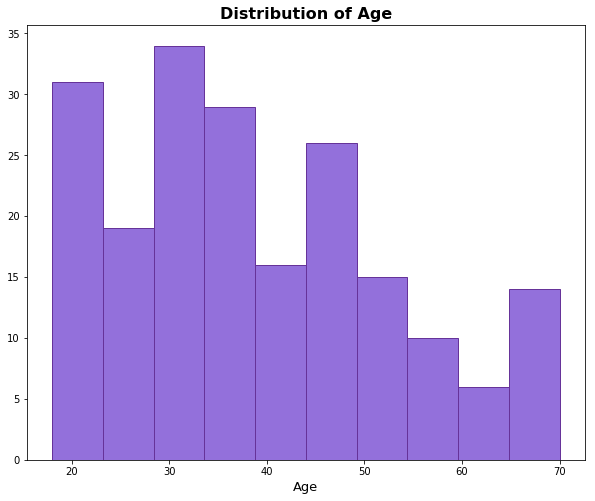

In [22]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Age', fontsize = 16, fontweight='bold')
plt.hist(data['Age'], color = 'mediumpurple', edgecolor = 'rebeccapurple')
plt.xlabel('Age', fontsize = 13)
plt.savefig('Distribution of Age.png', bbox_inches = 'tight')
plt.grid(False)

In [23]:
income = data[['Annual Income (k$)']].describe()
income

,Annual Income (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


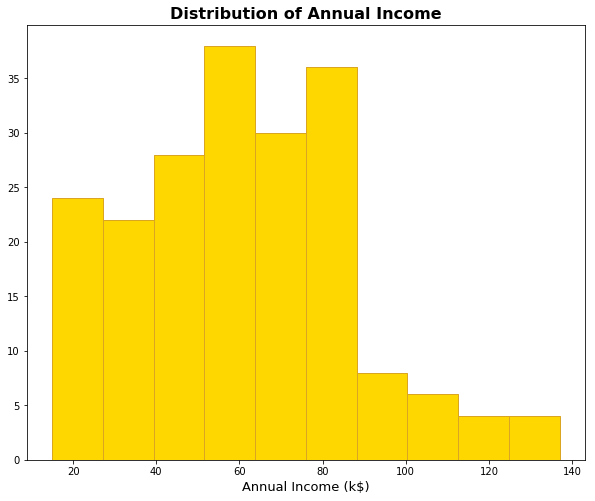

In [24]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Annual Income', fontsize = 16, fontweight='bold')
plt.hist(data['Annual Income (k$)'], color = 'gold', edgecolor = 'goldenrod')
plt.xlabel('Annual Income (k$)', fontsize = 13)
plt.savefig('Distribution of Annual Income.png', bbox_inches = 'tight')
plt.grid(False)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


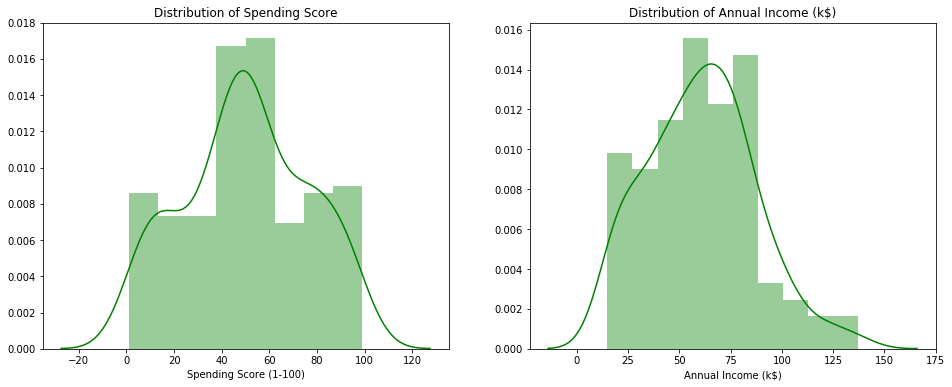

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(data['Spending Score (1-100)'], color = 'green')
plt.title('Distribution of Spending Score')
plt.subplot(1,2,2)
sns.distplot(data['Annual Income (k$)'], color = 'green')
plt.title('Distribution of Annual Income (k$)')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


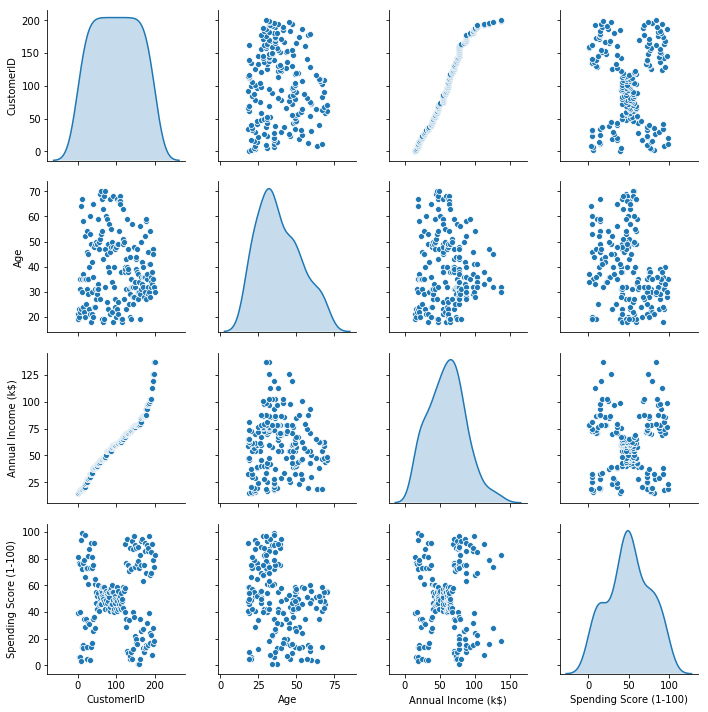

In [26]:
sns.pairplot(data=data, diag_kind="kde")
plt.savefig('Distribution.png', bbox_inches = 'tight')

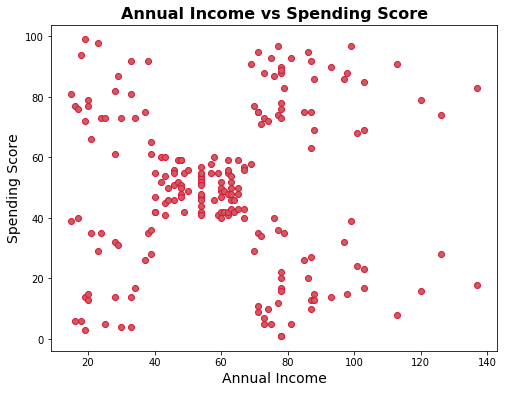

In [27]:
plt.figure(figsize=(8,6))
plt.title('Annual Income vs Spending Score', fontsize = 16, fontweight='bold')  
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color = 'indianred', edgecolors = 'crimson')
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Spending Score', fontsize = 14)
plt.savefig('Annual Income vs Spending Score.png', bbox_inches = 'tight')
plt.show()

Text(0, 0.5, 'Spending Score')

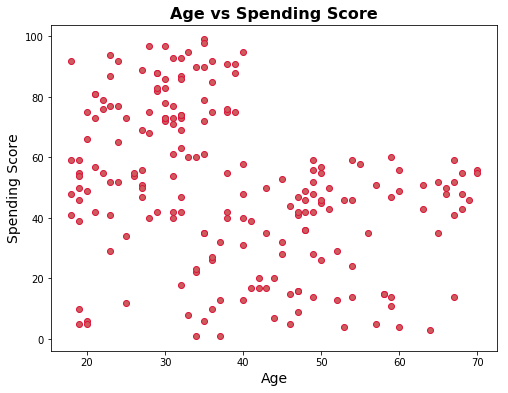

In [28]:
plt.figure(figsize=(8,6))
plt.title('Age vs Spending Score', fontsize = 16, fontweight='bold')  
plt.scatter(data['Age'], data['Spending Score (1-100)'], color = 'indianred', edgecolors = 'crimson')
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Spending Score', fontsize = 14)

**<font size="4">4. Clustering using K-Means.</font>**

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects.

The K-Means algorithm often referred to as Lloyd’s algorithm, is an unsupervised learning algorithm that clusters data. This algorithm requires the number of clusters to be specified.

The algorithm works as follows:

The first step chooses the initial centroids (a data point at the center of a cluster).
Second step assigns each sample to its nearest centroid.
Creates new centroids by taking the mean value of all of the samples assigned to each previous centroid.
The difference between the old and the new centroids are computed and the algorithm repeats steps 2 and 3 until convergence has been reached. In other words, it repeats until the centroids do not move significantly.

**<font size="3">Segmentation using Annual Income and Spending Score</font>**

In this case is easy to visualize how many clusters we should choose (k = 5), but that's not always the case, specially when we are working with a higher dimensional dataset that cannot be visualized.

The **elbow method** is a useful graphical tool to estimate the optimal number of clusters. Within-Cluster Sum of Squared Error ("distortion") measures how much data samples deviate from their respective centroids in a set of clustering results. If you plot WSSE for different values for k, we can see how this error measure changes as the value of k changes as seen in the plot.

One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. The bend in thes error curve indicates a drop in gain by adding more clusters. This "Elbow" in the curve provides a suggestion for a good value of k.

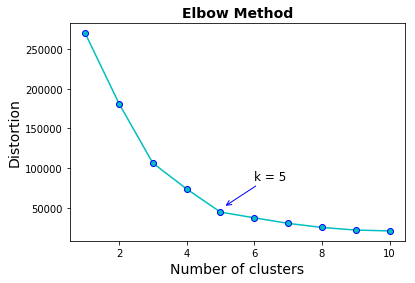

In [29]:
# calculate distortion for a range of number of cluster
X = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.title('Elbow Method', fontsize = 14, fontweight='bold')
plt.plot(range(1, 11), distortions, 'c', marker='o', markeredgecolor = 'b')
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Distortion', fontsize = 14)
plt.annotate('k = 5', xy=(5.1, 51000), xytext=(6, 85000),fontsize = 12, arrowprops={'arrowstyle': '->', 'color': 'blue'})
plt.savefig('Elbow Method.png', bbox_inches = 'tight')
plt.show()

Now let's execute K-means algorithm with 5 clusters and see the output graph.

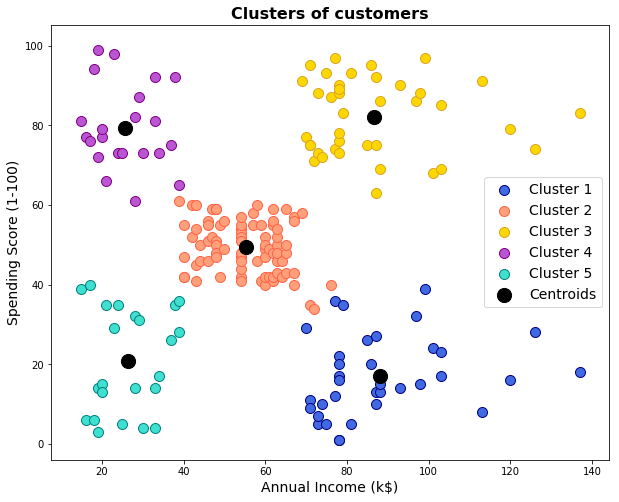

In [30]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'royalblue', edgecolors = 'navy', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightsalmon', edgecolors = 'tomato', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'gold', edgecolors = 'goldenrod', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'mediumorchid', edgecolors = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'turquoise', edgecolors = 'teal', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers', fontsize = 16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize = 14)
plt.ylabel('Spending Score (1-100)', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('Clusters of customers.png', bbox_inches = 'tight')
plt.show()

We obteined 5 clusters, each identified with different colors, while the centroids are in black. Now let's examine each cluster.

In [31]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
num_cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset
data['cluster'] = num_cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
1,164.4,41.1,88.2,17.1
2,86.3,42.7,55.3,49.5
3,162.0,32.7,86.5,82.1
4,23.1,25.3,25.7,79.4
5,23.0,45.2,26.3,20.9


In [34]:
gender_count_cluster = data[['cluster','Gender', 'CustomerID']].groupby(['cluster','Gender']).count()
gender_count_cluster

CustomerID
cluster Gender            
1       Female          16
        Male            19
2       Female          48
        Male            33
3       Female          21
        Male            18
4       Female          13
        Male             9
5       Female          14
        Male             9

In [35]:
total_cluster = data[['cluster','CustomerID']].groupby(['cluster']).count()
total_cluster

,CustomerID
cluster,
1,35
2,81
3,39
4,22
5,23


In [36]:
def as_perc(value, total):
    return round((value/total)*100,2)

per = gender_count_cluster.apply(as_perc, total = total_cluster['CustomerID'])
per

CustomerID
cluster Gender            
1       Female       45.71
        Male         54.29
2       Female       59.26
        Male         40.74
3       Female       53.85
        Male         46.15
4       Female       59.09
        Male         40.91
5       Female       60.87
        Male         39.13

**<font size="4">Conclusion.</font>**

The k-means analysis help us to identify what are the consumers that spent more in this supermarket. In this case, we obtain two groups:

* Group 1: cluster 3 with an average spending score of 82.1
* Group 2: cluster 4 with an average spending score of 79.4

Each of this clusters help us analyze these customers in terms of annual income, age and gender.
